     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

[Text(0.5555555555555556, 0.875, 'X[2] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 0.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 0.5\ngini = 0.263\nsamples = 314\nvalue = [265, 49]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.252\nsamples = 237\nvalue = [202, 35]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.298\nsamples = 77\nvalue = [63, 14]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 0.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 0.5\ngini = 0.465\nsamples = 147\nvalue = [54, 93]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.097\nsamples = 59\nvalue = [3, 56]')]

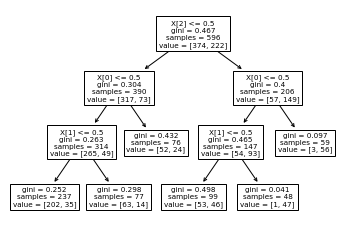

In [6]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time # for timing processes
import random # for generating random values

def take_first(my_list):
    return my_list[0]

short_list = [13, 25, 42]
tic = time.process_time()
first = take_first(short_list)
toc = time.process_time()

first
toc-tic




# array
x = np.array([25, 2, 5])

# Searching and Sorting
# Topics in this section:1.Binary search 2.Bubble sort 3.Merge sort 4.Quick sort


# Binary search O(logn)
# iteration
def binary_search(array, value):
    
    low = 0
    high = len(array)-1
    
    while low <= high:
        midpoint = (low + high) // 2 # rounds down to nearest integer after division
        if value < array[midpoint]:
            high = midpoint-1
        elif value > array[midpoint]:
            low = midpoint+1
        else:
            return midpoint
    return -1

# recursion
def recursive_binary_search(array, value, low, high):
    
    if low <= high:
        
        midpoint = (low + high) // 2
        
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1


# Bublle sort O(n^2)
def bubble_sort(array):
    
    n = len(array)
    
    for i in range(n-1):
        for j in range(0, n-1): # could be n-i-1 as, e.g., top value is guaranteed to have bubbled up in 1st iteration
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                
    return array

# Merge sort O(nlogn)
def merge_sort(my_list): # using list instead of array so we can .pop() (np arrays don't pop with built-in method)
    
    if len(my_list) > 1: # if length is 1, no need to sort (at deepest recursion, some will have len 1, others len 2)
        
        # 1. Halve: 
        midpoint = len(my_list) // 2 # Note: This is ~O(log n) behavior
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]
        
        # 2. Sort (recursively):
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)
        
        my_list = []
        
        # 3. Merge: 
        while len(left_half)>0 and len(right_half)>0: # Note: This inner loop exhibits ~O(n) behavior
            
            if left_half[0] < right_half[0]:
                my_list.append(left_half.pop(0)) # pop first element
            
            else: # 1st element of right half < 1st element of left
                my_list.append(right_half.pop(0))
                
        # If any elements remain from either half, they must be the largest value:
        for i in left_half:
            my_list.append(i)
        for i in right_half:
            my_list.append(i)
    
    return my_list

# Quick sort
def quick_sort(array):
    _quick_sort(array, 0, len(array)-1) # to start, low is index of first element in array; high is penultimate
    return array

def _quick_sort(array, low, high): 
    
    if low < high: # when low reaches high, we know all elements in array must be in order
        
        # Result of 2.: Element at "partitioning index" has been pivoted to its correct position
        p_index = partition(array, low, high) 
        
        # 3. Recursively sort the elements below the partitioning index...
        _quick_sort(array, low, p_index-1)
        # ...and, separately, above the partitioning index: 
        _quick_sort(array, p_index+1, high)
        
    return array

def partition(array, low, high):
    
    # 1. Use the final element as the pivot:
    pivot = array[high]
    
    i = (low-1) # index of element on small side
    for j in range(low, high): # like a bubble swap, we compare pivot to all elements between low and high
        if array[j] < pivot: # if value < pivot, it's correctly on left so increment the smaller element's index...
            i = i+1
            array[i], array[j] = array[j], array[i] 
    array[i+1], array[high] = array[high], array[i+1] # ...otherwise, swap greater value to right of pivot (now what we want)
    return(i+1) # return index of correctly positioned pivot




# Hashing
def simple_hash(v):
    split_v = [digit for digit in str(v)]
    final_2 = int(''.join(split_v[-2:]))
    return final_2 % 10

# Three common ways to resolve collisions:
# Change the modulus denominator (e.g., 10 --> 11); this adds procedural (and thus time) complexity to hash algo
# Change the hash function entirely; ditto w.r.t. procedural complexity
# Store a list (or similar) at the index, e.g.:



titanic = sns.load_dataset('titanic')
print(titanic)
np.unique(titanic['survived'], return_counts=True)
np.unique(titanic['sex'], return_counts=True)
np.unique(titanic['class'], return_counts=True)



gender = pd.get_dummies(titanic['sex'])
clas = pd.get_dummies(titanic['class'])

from sklearn.model_selection import train_test_split
X = pd.concat([clas.First, clas.Second, gender.female], axis=1)
y = titanic.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
plot_tree(dt_model)

from sklearn.metrics import accuracy_score, roc_auc_score
accuracy_score(y_test, dt_yhat)
roc_auc_score(y_test, dt_yhat)

# Random Forests
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)

# Gradient-Boosted Trees
import xgboost as xgb